In [0]:
import tensorflow as tf

In [0]:
mnist=tf.keras.datasets.mnist
callbacks=mycallback()

In [0]:
(x_train,y_train) ,(x_test,y_test)=mnist.load_data()
#now we have to normalise the data or to be specific scale the data
x_train= tf.keras.utils.normalize(x_train,axis=1)
x_test= tf.keras.utils.normalize(x_test,axis=1)

#model building
model=tf.keras.models.Sequential() # using sequential model as it is most commonly used
model.add(tf.keras.layers.Flatten())# flatening the input matrix into one column
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # adding hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3,callbacks=[callbacks])

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1851/1875 [============================>.] - ETA: 0s - loss: 0.2601 - accuracy: 0.9246
 the loss is too low stop the training
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2586 - accuracy: 0.9250
Epoch 2/3
1857/1875 [============================>.] - ETA: 0s - loss: 0.1072 - accuracy: 0.9671
 the loss is too low stop the training
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1071 - accuracy: 0.9671
Epoch 3/3
1861/1875 [============================>.] - ETA: 0s - loss: 0.0737 - accuracy: 0.9768
 the loss is too low stop the training
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0738 - accuracy: 0.9768


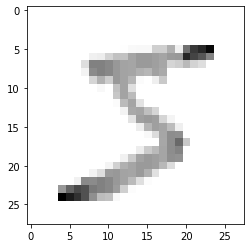

In [0]:
#print(x_train[0])
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [0]:
 val_loss ,val_acc=model.evaluate(x_test , y_test)
 print(val_loss,val_acc)
 
 

313/313 [==============================] - 0s 1ms/step - loss: 0.0897 - accuracy: 0.9725
0.08970120549201965 0.9725000262260437


In [0]:
model.save('epic_num_reader.model')


INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [0]:
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions=new_model.predict(x_test)
print(predictions)


[[3.6749281e-08 3.3652038e-06 1.0956368e-05 ... 9.9987137e-01
  3.5562741e-07 3.9530291e-06]
 [1.4486027e-06 9.4713341e-04 9.9902093e-01 ... 1.2667622e-08
  2.4979820e-06 6.3870162e-09]
 [4.9890588e-07 9.9975079e-01 5.1385072e-05 ... 7.7568657e-05
  8.9750414e-05 2.2700174e-06]
 ...
 [1.2073093e-07 9.9722308e-07 4.4716330e-07 ... 1.4168836e-05
  1.4003537e-05 1.1951223e-04]
 [2.8756001e-06 4.4182823e-07 7.7508668e-07 ... 8.0251959e-07
  3.8550822e-03 2.3370616e-08]
 [4.2217298e-06 1.0201579e-07 6.9195568e-07 ... 3.9820283e-10
  9.8395283e-08 3.7181032e-08]]


In [0]:
import numpy as np
print(np.argmax(predictions[0]))

if np.argmax(predictions[0]) == y_test[0] :
             print("Correct answer")

7
Correct answer


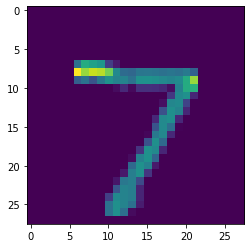

In [0]:
plt.imshow(x_test[0])
plt.show()

In [0]:
print(y_test[0])
#print(x_test[0])

7


In [0]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,log={}):
    if(log.get('loss')< 0.4):
      print("\n the loss is too low stop the training")
      self.model.stop_trainig=True
    
